## Observations and Insights 

I know this isn't finished. I will pick it back up after project 1 when we have time to go back over it. 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sb
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
mouse_study.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [6]:
# Checking the number of mice.
mouse_metadata.shape

(249, 5)

In [7]:
mouse_study = mouse_study.rename(columns={"Mouse ID": "mouse_id", "Weight (g)": "weight", "Drug Regimen": "drug_regimen", "Tumor Volume (mm3)": "tumor_volume", "Metastatic Sites": "meta_sites"})
mouse_study.head()

,mouse_id,Timepoint,tumor_volume,meta_sites,drug_regimen,Sex,Age_months,weight
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study.groupby(['mouse_id', 'Timepoint']).size().sort_values(ascending=False)


mouse_id  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = mouse_study.mouse_id == "g989"
mouse_study.loc[mask]

,mouse_id,Timepoint,tumor_volume,meta_sites,drug_regimen,Sex,Age_months,weight
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = mouse_study.mouse_id != "g989"
clean_df = mouse_study.loc[mask].reset_index(drop=True)


clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mouse_id      1880 non-null   object 
 1   Timepoint     1880 non-null   int64  
 2   tumor_volume  1880 non-null   float64
 3   meta_sites    1880 non-null   int64  
 4   drug_regimen  1880 non-null   object 
 5   Sex           1880 non-null   object 
 6   Age_months    1880 non-null   int64  
 7   weight        1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_df.nunique()

mouse_id         248
Timepoint         10
tumor_volume    1633
meta_sites         5
drug_regimen      10
Sex                2
Age_months        24
weight            16
dtype: int64

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
avgs = clean_df.groupby("drug_regimen")["tumor_volume"].mean()
meds = clean_df.groupby("drug_regimen")["tumor_volume"].median()
varss = clean_df.groupby("drug_regimen")["tumor_volume"].var()
stds = clean_df.groupby("drug_regimen")["tumor_volume"].std()
sems = clean_df.groupby("drug_regimen")["tumor_volume"].sem()

# Assemble the resulting series into a single summary dataframe.
summ_df = pd.concat([avgs, meds, varss, stds, sems], axis=1)
summ_df.columns = ["Mean", "Median", "Var", "Std", "SEM"]
summ_df

,Mean,Median,Var,Std,SEM
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summ_df2 = clean_df.groupby("drug_regimen").agg({"tumor_volume": ["mean", "median", "var", "std", "sem"]})
summ_df2

tumor_volume                                          
                     mean     median        var       std       sem
drug_regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466
Placebo         54.033581  52.288934  61.168083  7.821003  0.581331
Propriva        52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane        40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn        54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol       53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

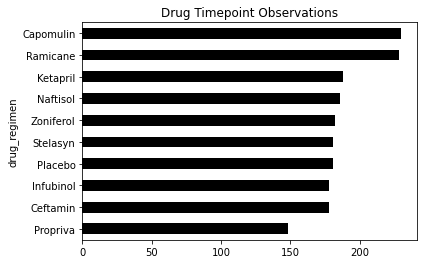

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_df.groupby("drug_regimen").size().sort_values(ascending=True).plot(kind="barh", xlabel='drug_regimen', ylabel='Timepoints', title="Drug Timepoint Observations", color='black')
plt.show()


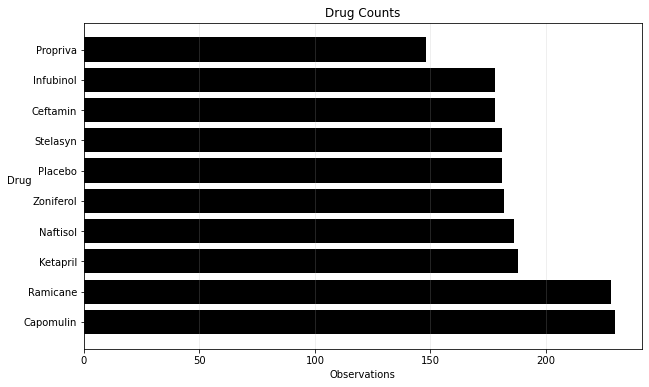

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
data = clean_df.groupby("drug_regimen").size().sort_values(ascending=False).reset_index()
data.columns = ["Drug Regimen", "Observations"]

plt.figure(figsize=(10,6))

plt.barh(data["Drug Regimen"], data.Observations, color="black")
plt.title("Drug Counts")
plt.ylabel("Drug", rotation=0)
plt.xlabel('Observations')
plt.xticks
plt.grid(axis="x", alpha=.25)

plt.show()


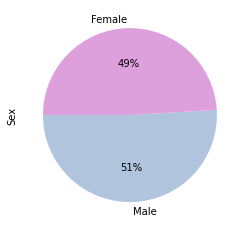

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ["lightsteelblue", 'plum']
clean_df.Sex.value_counts().plot(kind="pie", autopct='%1.0f%%', colors=colors, startangle=180)

plt.show()

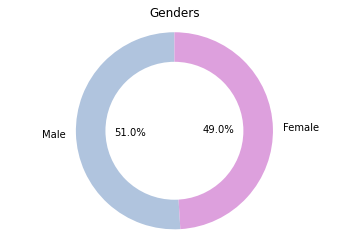

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df3 = clean_df["Sex"].value_counts().reset_index()
df3.columns = ["Gender", "Count"]

pies = df3.Gender
pie_votes = df3["Count"]
colors = ["lightsteelblue", 'plum']


# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_votes, labels=pies, colors=colors,
        autopct="%1.1f%%", startangle=90, pctdistance=.45)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Genders")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
times = clean_df.groupby('mouse_id').Timepoint.max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df4 = pd.merge(clean_df, times, on=['mouse_id', 'Timepoint'], how='inner')
df4

,mouse_id,Timepoint,tumor_volume,meta_sites,drug_regimen,Sex,Age_months,weight
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [19]:
df4.iloc[df4.groupby("mouse_id").Timepoint.idxmax()]

,mouse_id,Timepoint,tumor_volume,meta_sites,drug_regimen,Sex,Age_months,weight
159,a203,45,67.973419,2,Infubinol,Female,20,23
141,a251,45,65.525743,1,Infubinol,Female,21,25
138,a262,45,70.717621,4,Placebo,Female,17,29
211,a275,45,62.999356,3,Ceftamin,Female,20,28
91,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
29,z435,10,48.710661,0,Propriva,Female,12,26
154,z578,45,30.638696,0,Ramicane,Male,11,16
139,z581,45,62.754451,3,Infubinol,Female,24,25
242,z795,45,65.741070,3,Naftisol,Female,13,29


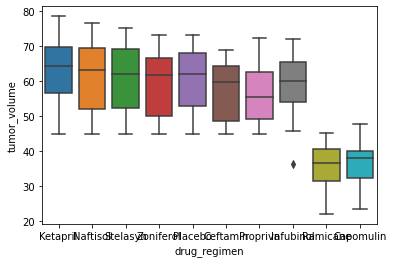

In [21]:
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
df5 = df4.loc[df4["drug_regimen"].isin(drugs)].reset_index(drop=True)

sb.boxplot(data=df4, x="drug_regimen", y="tumor_volume")

plt.show()

In [171]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin", "Ramicane", "Infubinol", "Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

[Series([], Name: tumor_volume, dtype: float64)]


In [1]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

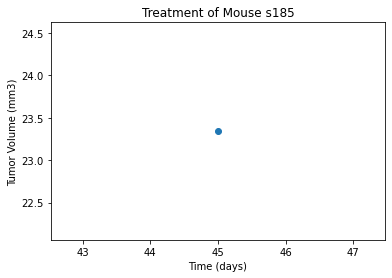

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = df4.loc[df4['mouse_id'] == 's185']

plt.plot(mouse['Timepoint'], mouse['tumor_volume'], marker = 'o')
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Treatment of Mouse s185")

plt.show()

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
